In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gdown --id 1eiVhi2l6aCoN8o-NUTLxOgHi_4po1o8B

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py", line 377, in _make_request
    httplib_response = conn.getresponse(buffering=True)
TypeError: getresponse() got an unexpected keyword argument 'buffering'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.7/ssl.py", line 929, in read
    return self._sslobj.read(len, buffer)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/bin/gdown", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.7/dist-packages/gdown/cli.py", line 166, in main
    resume=args.continue_,
  File "

In [ ]:
!apt-get install p7zip-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.


In [ ]:
!7za x data.zip


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         
ERROR: No more files
data.zip



System ERROR:
Unknown error -2147024872


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.applications import EfficientNetB0
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix
# import visualkeras
import os
from tqdm import tqdm
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
train_path = "/content/data/train"
test_path = "/content/data/test"


In [ ]:
numberOfClass = len(glob(train_path+"/*"))
print("Number of Class: ",numberOfClass)

Number of Class:  4


In [ ]:
labels = ['COVID19','NORMAL','PNEUMONIA','TURBERCULOSIS']

In [ ]:
X_train = []
y_train = []
image_size = 224
for i in labels:
    folderPath = os.path.join(train_path,i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join(train_path,i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 592/592 [00:03<00:00, 164.81it/s]


In [ ]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [ ]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [ ]:
X_train.shape

(37536, 224, 224, 3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
!pip install keras_efficientnet_v2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import keras_efficientnet_v2
efficientNet1 = keras_efficientnet_v2.EfficientNetV2S(pretrained="imagenet",input_shape=(224,224,3))

87859200/87846816 [==============================] - 8s 0us/step
>>>> Load pretrained from: /root/.keras/models/efficientnetv2/efficientnetv2-s-imagenet.h5


In [ ]:
model = efficientNet1.output
model = tf.keras.layers.Dropout(rate=0.2)(model)
model = tf.keras.layers.Dense(1024, activation = 'relu')(model)
model = tf.keras.layers.Dense(numberOfClass,activation='softmax')(model)
model = tf.keras.models.Model(inputs=efficientNet1.input, outputs = model)

In [ ]:
import keras.models
model = keras.models.load_model('/content/model_1.h5')

In [ ]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("model_3.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',
                              factor = 0.3,
                              patience = 2,
                              min_delta = 0.001,
                              mode='auto',verbose=1)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'Adam',
              metrics= ['accuracy'])

In [ ]:
hoho = model.fit(X_train,
                 y_train,
                 validation_split=0.1,
                 epochs =10,
                 verbose=1,
                 batch_size=64,
                 callbacks=[tensorboard,checkpoint,reduce_lr]
                 )

In [ ]:
model.evaluate(X_test, y_test,batch_size=128, verbose = 1) 

16/16 [==============================] - 4s 235ms/step - loss: 0.0632 - accuracy: 0.9867


[0.06317311525344849, 0.9867075681686401]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


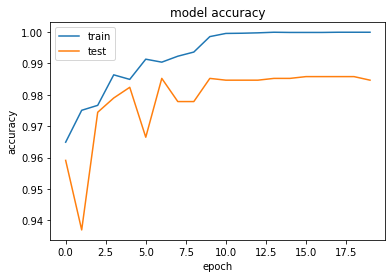

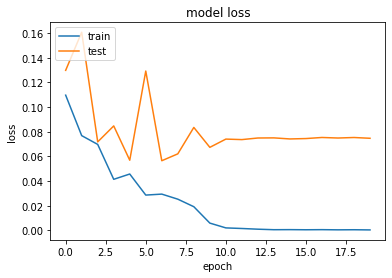

In [ ]:
print(hoho.history.keys())
#accuracy
plt.plot(hoho.history['accuracy'])
plt.plot(hoho.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(hoho.history['loss'])
plt.plot(hoho.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [ ]:
model = keras.models.load_model('/content/model_2.h5')

In [ ]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("model_3.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',
                              factor = 0.1,
                              patience = 4,
                              min_delta = 0.0001,
                              mode='auto',
                              verbose=1)

In [ ]:
hoho = model.fit(X_train,
                 y_train,
                 validation_split=0.1,
                 epochs =20,
                 verbose=1,
                 batch_size=64,
                 callbacks=[tensorboard,checkpoint,reduce_lr]
                 )

Epoch 1/20
248/248 [==============================] - ETA: 0s - loss: 0.0082 - accuracy: 0.9982
Epoch 1: val_accuracy improved from -inf to 0.99886, saving model to model_2.h5
248/248 [==============================] - 133s 503ms/step - loss: 0.0082 - accuracy: 0.9982 - val_loss: 0.0062 - val_accuracy: 0.9989 - lr: 8.1000e-06
Epoch 2/20
248/248 [==============================] - ETA: 0s - loss: 0.0068 - accuracy: 0.9988
Epoch 2: val_accuracy did not improve from 0.99886
248/248 [==============================] - 120s 483ms/step - loss: 0.0068 - accuracy: 0.9988 - val_loss: 0.0062 - val_accuracy: 0.9989 - lr: 8.1000e-06
Epoch 3/20
248/248 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 0.9989
Epoch 3: val_accuracy improved from 0.99886 to 0.99943, saving model to model_2.h5
248/248 [==============================] - 121s 489ms/step - loss: 0.0055 - accuracy: 0.9989 - val_loss: 0.0063 - val_accuracy: 0.9994 - lr: 8.1000e-06
Epoch 4/20
248/248 [======================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


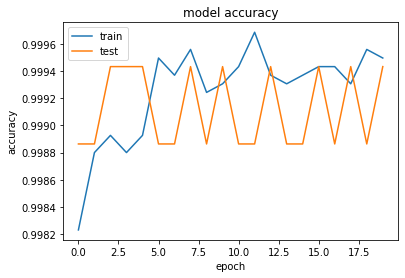

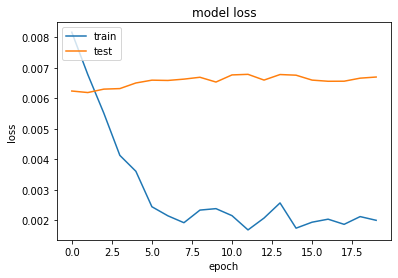

In [ ]:
print(hoho.history.keys())
# summarize history for accuracy
plt.plot(hoho.history['accuracy'])
plt.plot(hoho.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hoho.history['loss'])
plt.plot(hoho.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, y_test,batch_size=128, verbose = 1) 

16/16 [==============================] - 4s 221ms/step - loss: 0.0663 - accuracy: 0.9867


[0.06626533716917038, 0.9867075681686401]

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 24  648         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 24  96          ['stem_conv[0][0]']              
                                )                                                             

In [4]:
import keras
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

model = keras.models.load_model('model_2.h5')
def load_image(img_path, show=True):
    image_size = 224
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(image_size, image_size))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img
def prediction(img_path, show=True):
    img = load_image(img_path)
    pred = model.predict(img)
    print(pred)
    print(labels[np.argmax(pred)])

In [5]:
img_path = 'covid3.jpg'
prediction(img_path)


AttributeError: module 'keras.preprocessing.image' has no attribute 'img_to_array'

In [ ]:
!nvidia-smi

Mon Jul 11 10:59:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    39W / 250W |  15981MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------